<a href="https://colab.research.google.com/github/JF11579/CensusData/blob/master/Skinny_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Making wide data skinny as per DataNova.
Note it is not using hte latest tool PIVOT LONGER.
https://www.datanovia.com/en/blog/how-to-create-a-ggplot-with-multiple-lines/


In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
library(ggplot2)

In [ ]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


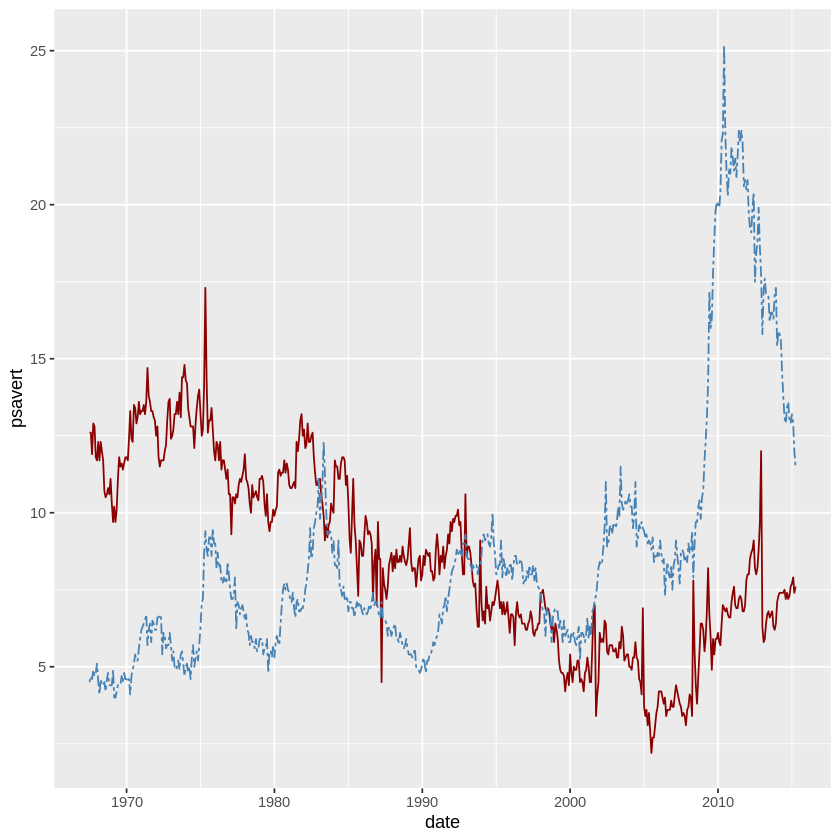

In [ ]:
ggplot(economics, aes(x=date)) + 
  geom_line(aes(y = psavert), color = "darkred") + 
  geom_line(aes(y = uempmed), color="steelblue", linetype="twodash") 

We need to make the data longer to get legend to work.
Collapse the variables psavert and unemped into key value pairs.

In [ ]:
head(economics,3)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958


In [ ]:
str(economics)

tibble [574 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date    : Date[1:574], format: "1967-07-01" "1967-08-01" ...
 $ pce     : num [1:574] 507 510 516 512 517 ...
 $ pop     : num [1:574] 198712 198911 199113 199311 199498 ...
 $ psavert : num [1:574] 12.6 12.6 11.9 12.9 12.8 11.8 11.7 12.3 11.7 12.3 ...
 $ uempmed : num [1:574] 4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: num [1:574] 2944 2945 2958 3143 3066 ...


In [ ]:
df<- economics %>%
    select(date, psavert, uempmed) %>%. #seslect these 3 columns: date,psavert, uemped
    gather(key = "variable" , value = "value", -date) #make col called VARIABLE, pair each with its date
head(df)

date,variable,value
<date>,<chr>,<dbl>
1967-07-01,psavert,12.6
1967-08-01,psavert,12.6
1967-09-01,psavert,11.9
1967-10-01,psavert,12.9
1967-11-01,psavert,12.8
1967-12-01,psavert,11.8


In [ ]:
str(df)

tibble [1,148 × 3] (S3: tbl_df/tbl/data.frame)
 $ date    : Date[1:1148], format: "1967-07-01" "1967-08-01" ...
 $ variable: chr [1:1148] "psavert" "psavert" "psavert" "psavert" ...
 $ value   : num [1:1148] 12.6 12.6 11.9 12.9 12.8 11.8 11.7 12.3 11.7 12.3 ...


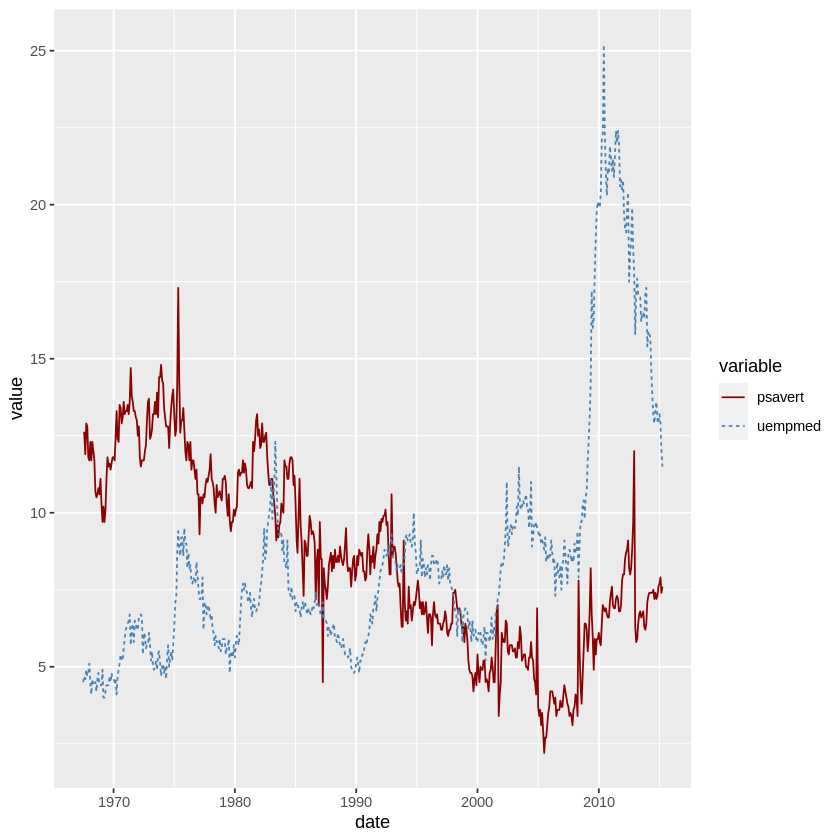

In [ ]:
# Visualization
ggplot(df, aes(x = date, y = value)) + 
  geom_line(aes(color = variable, linetype = variable)) + 
  scale_color_manual(values = c("darkred", "steelblue"))